# RIDWANULLAH IBRAHIM

### *@The Spark Foundation*


## TASK1: PREDICTION USING SUPERVISED ML

#### ***Here, I want to predict the percentage of marks of a student based on the hours used to study.***

In [7]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing the Dataset
dataset = pd.read_csv('student_scores.csv')

dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Studying the relationship between the data:

Text(0.5, 0.98, 'Regression Graph')

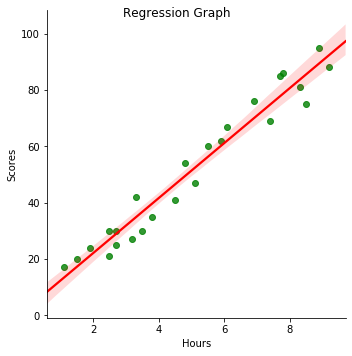

In [16]:
reg_plot = sns.lmplot('Hours','Scores',dataset, scatter_kws={'marker':'o','color':'green'}, line_kws={'color':'red'})
reg_plot.savefig('img1.png')
plt.suptitle('Regression Graph')

### Note: From the graph above, we can see that there is positive linear relationship between the Hours used for studying and the percentage Scores

##### y=mx+c  equation of a straight line

##### Data Pre-processing

In [23]:
# splitting the data into dependent variable (Y) and independent variable (X)
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values   

In [101]:
# splitting the datasets into train and and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

#### Training the Algorithm

In [25]:
# fitting simple linear regression on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train,Y_train)

###### Visualising the result

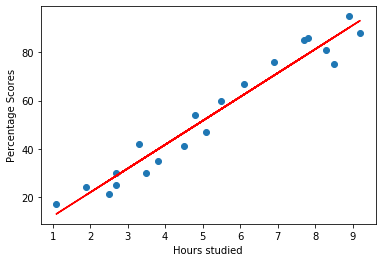

In [26]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.show()

 #### Predicting test set result

In [108]:
X_test = X_test.reshape(-1,1)
Y_pred = regressor.predict(X_test)
print('Predicted results = ')
print(Y_pred)

Predicted results = 
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [103]:
# Comparing the Actual data with the predicted data
Y_test = Y_test[:,0]
Y_pred = Y_pred[:,0]

df = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [49]:
# predicting with a specified hours (9.25hrs/day)
hours = 9.25
hours = np.reshape(hours,(-1,1))   # converting to array
my_prediction = regressor.predict(hours)
print('No of hours = ',hours)
print('Predicted score = ',my_prediction)

No of hours =  [[9.25]]
Predicted score =  [[93.69173249]]


#### Evaluating the Accuracy of the prediction

In [56]:
# from sklearn import metrics
# model accuracy
# print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred)*100)

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975
